## 2量子ビット

qiskitを利用して、量子アルゴリズムについて自分なりに勉強していこうと思います。
個人的な勉強の記録なので、説明などを大幅に省いている可能性があります。

qiskitのウェブサイト通りに勉強を進めています。

- https://qiskit.org/textbook/ja/preface.html 

前回は基本的な使い方と1量子ビットのゲート演算が中心でしたが、今回は2量子ビットの演算を理解します。


### github
- jupyter notebook形式のファイルは[こちら](https://github.com/hiroshi0530/wa-src/blob/master/rec/qiskit/base2/base_nb.ipynb)

### google colaboratory
- google colaboratory で実行する場合は[こちら](https://colab.research.google.com/github/hiroshi0530/wa-src/blob/master/rec/qiskit/base2/base_nb.ipynb)

### 筆者の環境

In [36]:
!sw_vers

ProductName:	Mac OS X
ProductVersion:	10.14.6
BuildVersion:	18G103


In [37]:
!python -V

Python 3.8.5


基本的なライブラリをインポートしそのバージョンを確認しておきます。

In [57]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pandas as pd

print('matplotlib version :', matplotlib.__version__)
print('scipy version :', scipy.__version__)
print('numpy version :', np.__version__)
print('pandas version :', pd.__version__)

matplotlib version : 3.3.2
scipy version : 1.5.2
numpy version : 1.19.2
pandas version : 1.1.3


In [64]:
import qiskit
import json

dict(qiskit.__qiskit_version__)

{'qiskit-terra': '0.17.4',
 'qiskit-aer': '0.8.2',
 'qiskit-ignis': '0.6.0',
 'qiskit-ibmq-provider': '0.13.1',
 'qiskit-aqua': '0.9.1',
 'qiskit': '0.26.2',
 'qiskit-nature': None,
 'qiskit-finance': None,
 'qiskit-optimization': None,
 'qiskit-machine-learning': None}

## 2量子ビットの状態

$$
|a\rangle=a_{00}|00\rangle+a_{01}|01\rangle+a_{10}|10\rangle+a_{11}|11\rangle=\left(\begin{array}{l}
a_{00} \\
a_{01} \\
a_{10} \\
a_{11}
\end{array}\right)
$$

各ベクトルの成分は上からそれぞれ、$|00\range$、$|01\range$、$|10\range$、$|11\range$の振幅を表し、ちょうど二進数表記となっています。

2量子ビットの状態はテンソル積を利用すると綺麗に表現できます。

$$
|a\rangle=\left(\begin{array}{l}
a_{0} \\
a_{1}
\end{array}\right), \quad|b\rangle=\left(\begin{array}{l}
b_{0} \\
b_{1}
\end{array}\right)
$$

$$
|b a\rangle=|b\rangle \otimes|a\rangle=\left(\begin{array}{l}
b_{0} \times\left(\begin{array}{c}
a_{0} \\
a_{1}
\end{array}\right) \\
b_{1} \times\left(\begin{array}{c}
a_{0} \\
a_{1}
\end{array}\right)
\end{array}\right)=\left(\begin{array}{c}
b_{0} a_{0} \\
b_{0} a_{1} \\
b_{1} a_{0} \\
b_{1} a_{1}
\end{array}\right)
$$

3量子ビットについても同様です。

$$
|c b a\rangle=\left(\begin{array}{l}
c_{0} b_{0} a_{0} \\
c_{0} b_{0} a_{1} \\
c_{0} b_{1} a_{0} \\
c_{0} b_{1} a_{1} \\
c_{1} b_{0} a_{0} \\
c_{1} b_{0} a_{1} \\
c_{1} b_{1} a_{0} \\
c_{1} b_{1} a_{1}
\end{array}\right)
$$

ベクトルの要素と振幅に関する考えた方も２次元と同じです。

### 回路

3つの量子ビットを用意して、それぞれにアダマールゲートを適用してみます。

In [59]:
from qiskit import *
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram

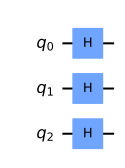

In [41]:
qc = QuantumCircuit(3)
qc.h(0)
qc.h(1)
qc.h(2)
qc.draw('mpl')

In [42]:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()

from qiskit_textbook.tools import array_to_latex
array_to_latex(final_state, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

三つの$|+++\rangle$で作られた状態になります。

## 複数量子ビットへの単一の量子ビットゲート

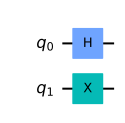

In [43]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw('mpl')

$H$と$X$による同時演算はテンソル積を用いて表現できます。

$$
X\left|q_{1}\right\rangle \otimes H\left|q_{0}\right\rangle=(X \otimes H)\left|q_{1} q_{0}\right\rangle
$$

この表現はとてもわかりやすいと思いました。$|q_1\rangle$と$H$が可換になっています。一般的なテンソル積は非可換です。

$$
X \otimes H=\left(\begin{array}{ll}
0 & 1 \\
1 & 0
\end{array}\right) \otimes \frac{1}{\sqrt{2}}\left(\begin{array}{cc}
1 & 1 \\
1 & -1
\end{array}\right)=\frac{1}{\sqrt{2}}\left(\begin{array}{cc}
0 \times\left(\begin{array}{cc}
1 & 1 \\
1 & -1
\end{array}\right) & 1 \times\left(\begin{array}{cc}
1 & 1 \\
1 & -1
\end{array}\right) \\
1 \times\left(\begin{array}{cc}
1 & 1 \\
1 & -1
\end{array}\right) & 0 \times\left(\begin{array}{cc}
1 & 1 \\
1 & -1
\end{array}\right)
\end{array}\right)=\frac{1}{\sqrt{2}}\left(\begin{array}{cccc}
0 & 0 & 1 & 1 \\
0 & 0 & 1 & -1 \\
1 & 1 & 0 & 0 \\
1 & -1 & 0 & 0
\end{array}\right)
$$

こちらも非常にわかりやすい表現です。

$$
X \otimes H=\left(\begin{array}{cc}
0 & H \\
H & 0
\end{array}\right)
$$

この辺の演算子はqiskitで簡単に取得できます。

In [44]:
# バックエンドでユニタリシミュレータを利用

backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,backend).result().get_unitary()

In [45]:
from qiskit_textbook.tools import array_to_latex
array_to_latex(unitary, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>

この結果は、

$$
X \otimes H=\left(\begin{array}{cc}
0 & H \\
H & 0
\end{array}\right)
$$

になっています。

## CNOTゲート



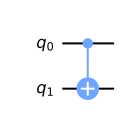

In [47]:
qc = QuantumCircuit(2)
qc.cx(0,1)

qc.draw('mpl')

In [48]:

backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,backend).result().get_unitary()
array_to_latex(unitary, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>

$$
\begin{array}{|c|c|}
\hline \text { Input (t,c) } & \text { Output (t,c) } \\
\hline 00 & 00 \\
01 & 11 \\
10 & 10 \\
11 & 01 \\
\hline
\end{array}
$$

## 重ね合わせの状態のビットに対するCNOTゲート

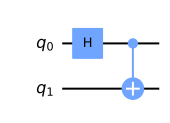

In [50]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw('mpl')

In [51]:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

$$
\operatorname{CNOT}|0+\rangle=\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)
$$

アダマールゲートとCNOTゲートでベル状態を作れました。これは振幅である$a_{01}$と$a_{11}$の振幅のスワップとなっています。

## ベル状態

$$
\operatorname{CNOT}|0+\rangle=\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)
$$

をベル状態といい、もつれた状態になっています。
よく知られるように、片方のビットの状態を測定すると、例えば、どれだけ距離が離れていても一瞬にしてもう片方の量子ビットの状態が決まってしまうことになります。

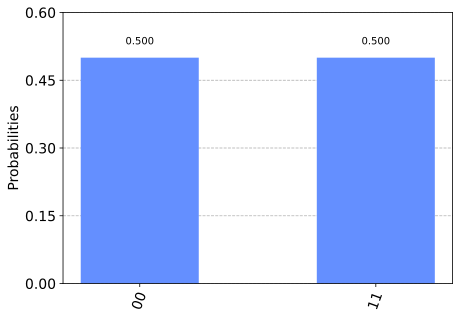

In [53]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

## 位相キックバック

In [62]:
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex

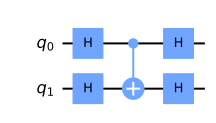

<IPython.core.display.Latex object>

In [89]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
display(qc.draw('mpl')) 

qc.save_unitary()
usim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }")

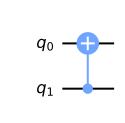

<IPython.core.display.Latex object>

In [91]:
qc = QuantumCircuit(2)
qc.cx(1,0)
display(qc.draw('mpl'))
qc.save_unitary()

qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }")

上では制御ビットが逆になっているにも関わるず等価なユニタリ行列になっています。これは位相キックバックの例となっています。


興味深い例が、制御ビットが重ね合わせの場合になります。CNOTゲートを$|-+\rangle$に適用すると、不思議なことに、制御ビットの方が影響を受けます。

$$
\begin{aligned}
\mathrm{CNOT}|-+\rangle &=\frac{1}{\sqrt{2}}(\mathrm{CNOT}|-0\rangle+\mathrm{CNOT}|-1\rangle) \\
&=\frac{1}{\sqrt{2}}(|-0\rangle+X|-1\rangle) \\
&=\frac{1}{\sqrt{2}}(|-0\rangle-|-1\rangle) \\
&=|-\rangle \otimes \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle) \\
&=|--\rangle
\end{aligned}
$$

制御ビットである$|+\rangle$が$|-\rangle$に変化しています。

次に、Tゲートを重ね合わせの状態のコントロールビットに適用してみます。

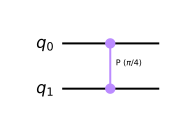

<IPython.core.display.Latex object>

In [74]:
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
display(qc.draw('mpl'))
# See Results:
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Controlled-T} = \n")

コントロールTは上の図の表記だと対象になっています。

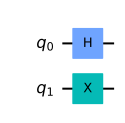

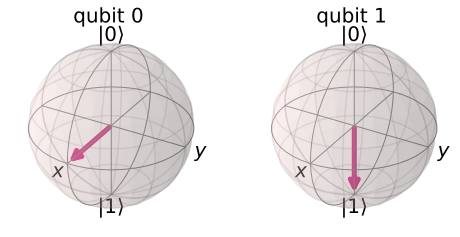

In [93]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
display(qc.draw('mpl'))

qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)

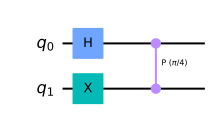

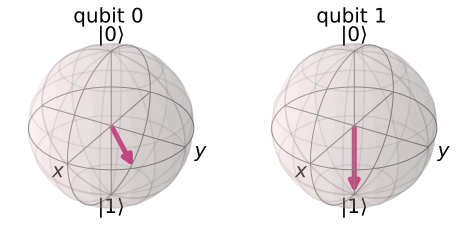

In [94]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)

# Add Controlled-T
qc.cp(pi/4, 0, 1)
display(qc.draw('mpl'))

qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)

こちらも制御ビットの方がZ軸に対して$\displaystyle \frac{\pi}{4}$だけ回転していることが分かります。制御Zゲートには、制御や標的量子ビットの区別はないという事のようです。これが理由で、qiskitでは、制御Z回転ゲートを対称な形で表現されています。素晴らしい。

位相キックバックはこちらの記事に綺麗にまとまっています。

- https://qiita.com/shnchr/items/ae194ba81cd07f2277f6#fn1

二つの量子ビットを用意し、最初のビットにアダマールゲートを適用し、二つ目の量子ビットに制御付きユニタリゲートを作用させるという簡単なモデルから位相キックバックを解説しています。

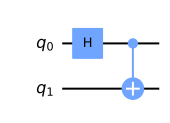

In [87]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
display(qc.draw('mpl'))

要約すると、ユニタリゲートとその固有ベクトルのをコントロールビットに入力すると、不思議なことに制御ビットの$|1\rangle$の位相に固有値が現れるという事になります。ターゲットビットに入力したユニタリゲートと固有ベクトルの固有値が、なぜか、コントロールビットの現れるという意味で、キックバックなんだと思います。

$$
\begin{array}{|c|c|c|l|}
\hline \text{Unitary} & |q_1\rangle & \text{eigenvalue of }|q_1\rangle  & \text{status} \\
\hline Z & |0\rangle & +1 & |+\rangle=\frac{1}{\sqrt{2}}(|0\rangle+1|1\rangle) \\
\hline Z & |1\rangle & -1 & |-\rangle=\frac{1}{\sqrt{2}}(|0\rangle-1|1\rangle) \\
\hline X & |+\rangle & +1 & |+\rangle=\frac{1}{\sqrt{2}}(|0\rangle+1|1\rangle) \\
\hline X & |-\rangle & -1 & |-\rangle=\frac{1}{\sqrt{2}}(|0\rangle-1|1\rangle) \\
\hline
\end{array}
$$

## 行列一般について

ユニタリ行列やエルミート行列、ゲートセットについてで解説がなされています。

- https://qiskit.org/textbook/ja/ch-gates/proving-universality.html

一応理学部物理学科出身で、量子力学や統計物理、量子情報なんかはやってきた記憶がありますが、改めて勉強すると、完成された理論で非常に理解しやすいという印象です。

当時は非常に理解するのに苦しみましたが、年も取り、当時より頭の柔軟性はなくなっているはずなのに、比較的脳みそにすっと入ってきます。もちろん、当時は素粒子論の理論物理の先生が書いた教科書で、ネット上で情報もそれほどなかった中でその教科書だけを頼りに勉強していたのが理由かもしれませんが、やはり自分でプログラムを書いたり、回路を図示して視覚的に理解できるというのはとても大きいことだと思います。

それにしても、これほどクオリティが高い教材を無料で利用できるとは、そちらの方が驚きかもしれません。IBM様々です。